In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score,cross_validate, KFold, cross_val_predict
from sklearn.feature_selection import VarianceThreshold

In [8]:
data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.strip()
        data.append(line.split(','))


names = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'target', 'none']

df = pd.DataFrame(data[145:], columns=names)

print(df.shape)

# Limpieza de espacios y codificación de datos categóricos
df = df.drop(columns=['none'])
df.replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes', ' no':'no'},inplace=True)
df.replace(to_replace = {'no':'0','yes':'1'},inplace=True)
df.replace(to_replace = {'\tnormal':'normal','\tabnormal':'abnormal'},inplace=True)
df.replace(to_replace = {'normal':'0','abnormal':'1'},inplace=True)
df.replace(to_replace = {'\tnotpresent':'notpresent','\tpresent':'present'},inplace=True)
df.replace(to_replace = {'notpresent':'0','present':'1'},inplace=True)
df.replace(to_replace = {'\tgood':'good','\tpoor':'poor'},inplace=True)
df.replace(to_replace = {'good':'0','poor':'1'},inplace=True)
df.replace(to_replace = {'\tnotckd':'notckd','\tckd':'ckd'},inplace=True)
df.replace(to_replace = {'notckd':'0','ckd':'1'},inplace=True)

# Eliminar registros que no contengan valor para la variable a predecir (target)
df.dropna(subset=['target'], inplace=True)

# Conversión a datos númericos
df = df.apply(lambda col: pd.to_numeric(col, errors='coerce'))

# Mostrar los tipos de datos
print(df.dtypes)

# Valores faltantes en el dataset, es decir que luego de la codificación y conversión quedaron como NaN
missing_values = df.isna().sum()

# Mostrar el porcentaje de valores faltantes por columna
missing_percentage = (missing_values / len(df)) * 100

# Información de valores faltantes
missing_info = pd.DataFrame({'Valores faltantes': missing_values, 'Porcentaje': missing_percentage})
print(missing_info)

# Identificar datos duplicados en el DataFrame
duplicated_data = df.duplicated()

# Mostrar los datos duplicados
print('Cantidad de datos duplicados:', duplicated_data.sum())

# Columnas que se van a imputar con la moda
columns_to_fill_mode = ['specific_gravity', 'albumin', 'sugar','red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
                          'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
                          'appetite', 'peda_edema', 'anemia']

# Moda
most_frequent_values = df[columns_to_fill_mode].mode().iloc[0]

# Reemplazo
for column in columns_to_fill_mode:
    df[column].fillna(most_frequent_values[column], inplace=True)


# Columnas que se van a imputar con la media
columns_to_fill_mean = [col for col in df.columns if col not in columns_to_fill_mode]

# Reemplazo
df.fillna(df.mean(), inplace=True)

df.shape

df

(402, 26)
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells            float64
pus_cell                   float64
pus_cell_clumps            float64
bacteria                   float64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension               float64
diabetes_mellitus          float64
coronary_artery_disease    float64
appetite                   float64
peda_edema                 float64
anemia                     float64
target                       int64
dtype: object
                         Valores faltantes  Porcentaje
age                                      9    

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,target
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.000000,...,47.0,6700.0,4.900000,0.0,0.0,0.0,0.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.000000,...,54.0,7800.0,6.200000,0.0,0.0,0.0,0.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,49.0,6600.0,5.400000,0.0,0.0,0.0,0.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.000000,...,51.0,7200.0,5.900000,0.0,0.0,0.0,0.0,0.0,0.0,0


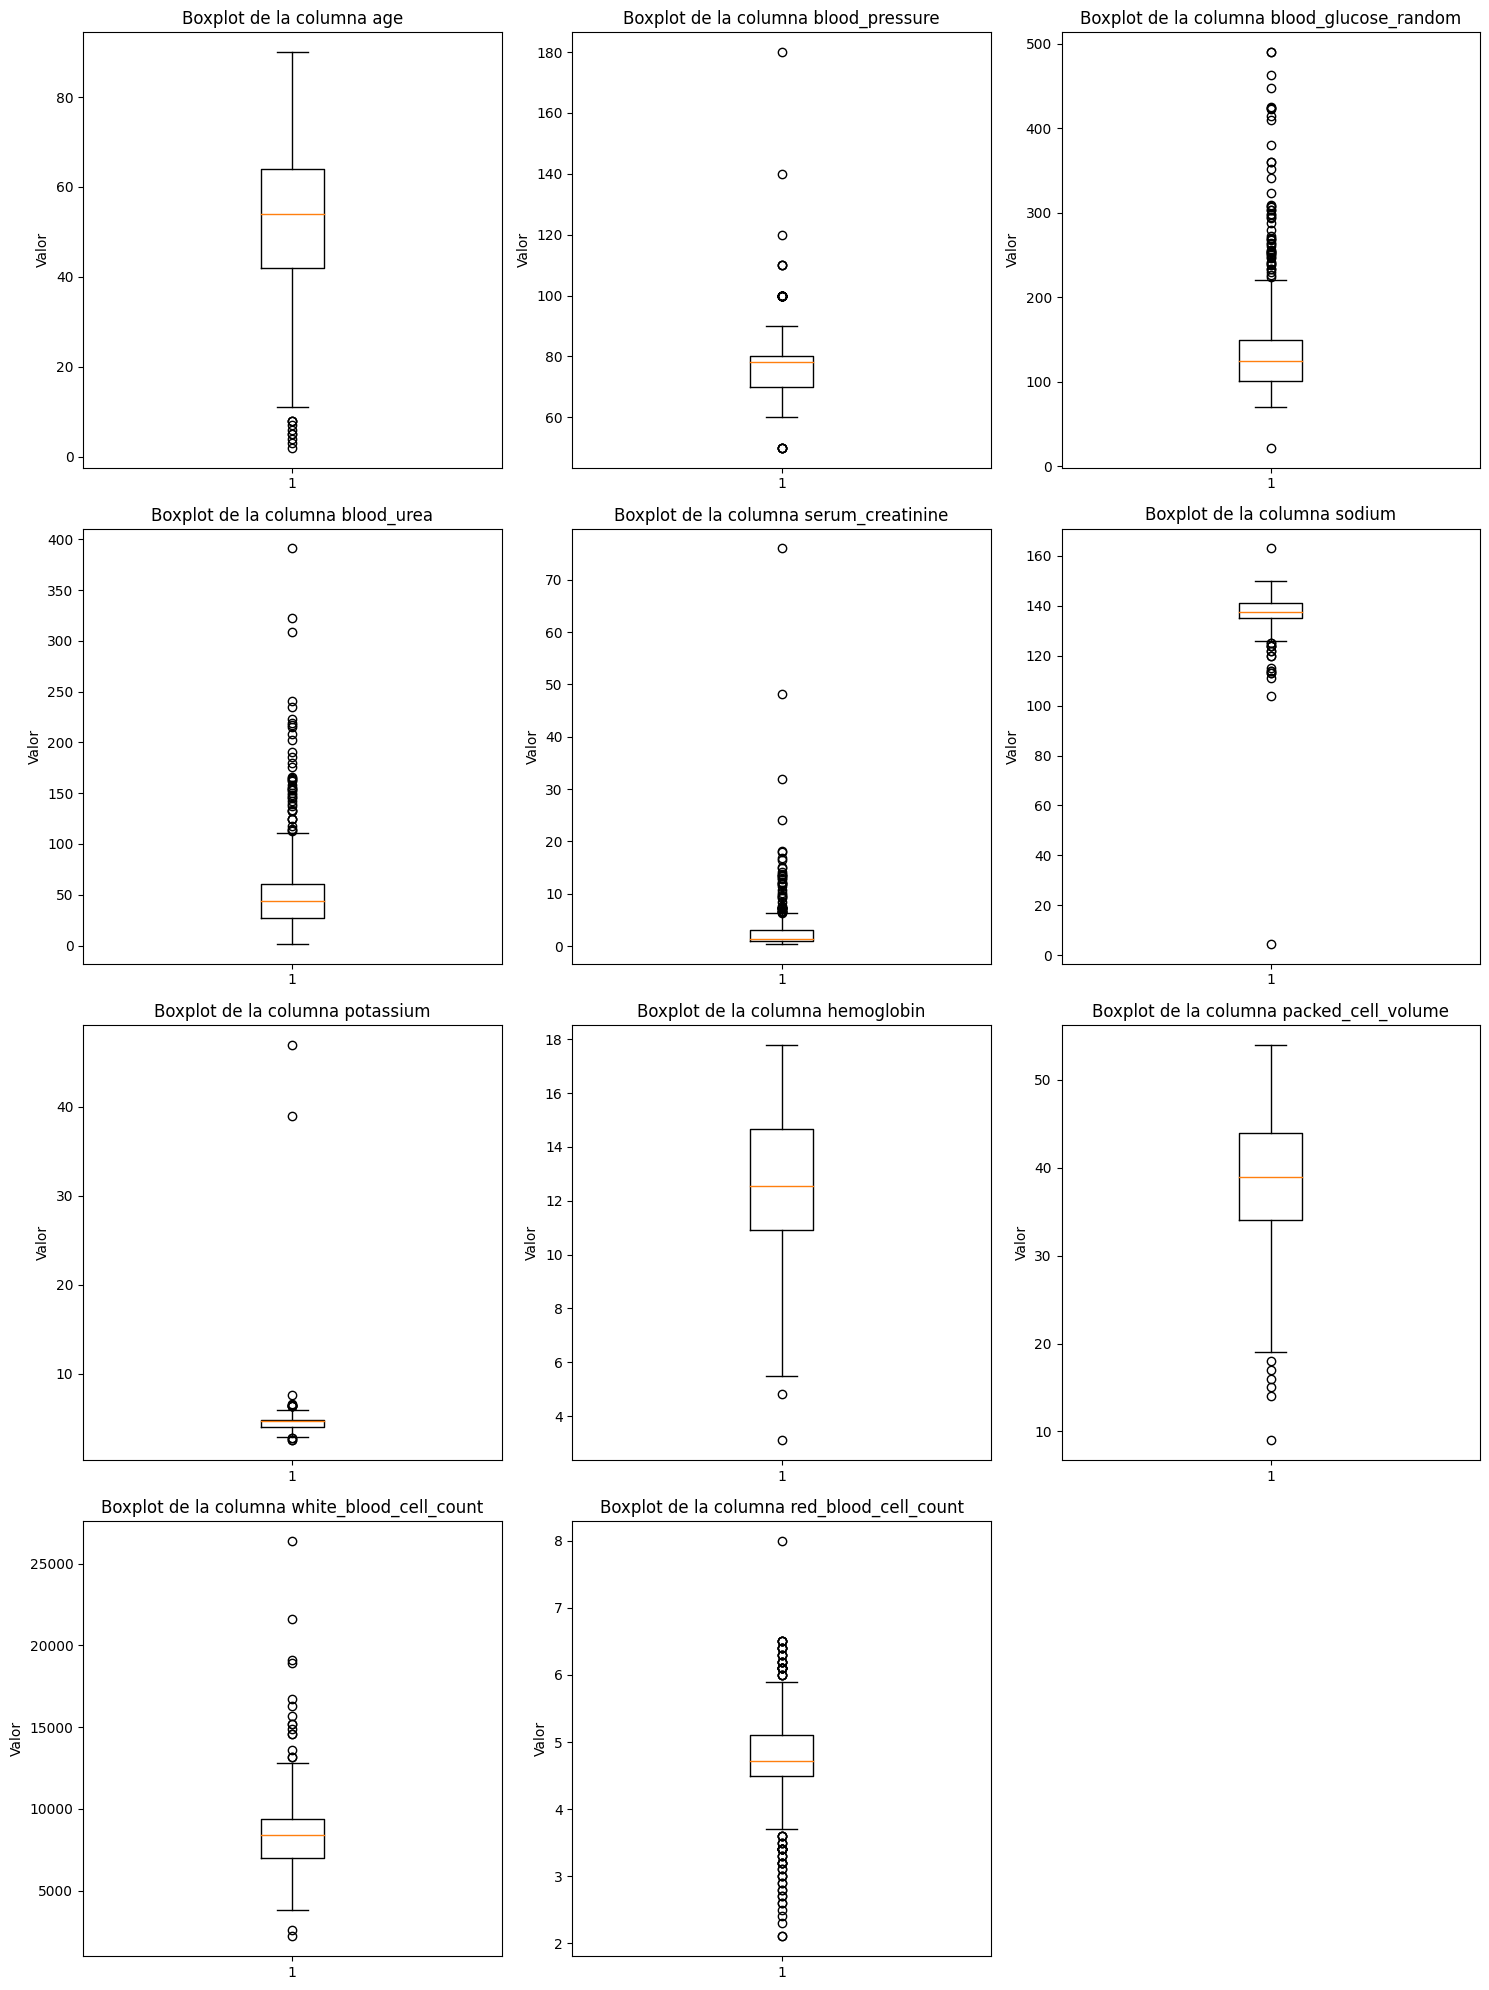

In [ ]:
# Seleccionar solo las columnas que queremos mostrar
columnas = [col for col in df.columns if col not in columns_to_fill_mode and col != 'target']

# Calcular el número de filas y columnas para organizar en una cuadrícula
num_filas = len(columnas) // 3 + (len(columnas) % 3 > 0)
num_columnas = 3

# Crear la cuadrícula de subgráficos
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))

# Aplanar la lista de ejes para facilitar el acceso
axes = axes.flatten()

# Crear un boxplot para cada columna en la cuadrícula
for i, columna in enumerate(columnas):
    ax = axes[i]
    ax.boxplot(df[columna].dropna())  # Elimina NaN antes de graficar
    ax.set_title('Boxplot de la columna {}'.format(columna))
    ax.set_ylabel('Valor')

# Ocultar los subgráficos no utilizados
for i in range(len(columnas), num_filas * num_columnas):
    fig.delaxes(axes[i])

# Ajustar el espaciado entre subgráficos
fig.tight_layout()

# Mostrar la cuadrícula de subgráficos
plt.show()

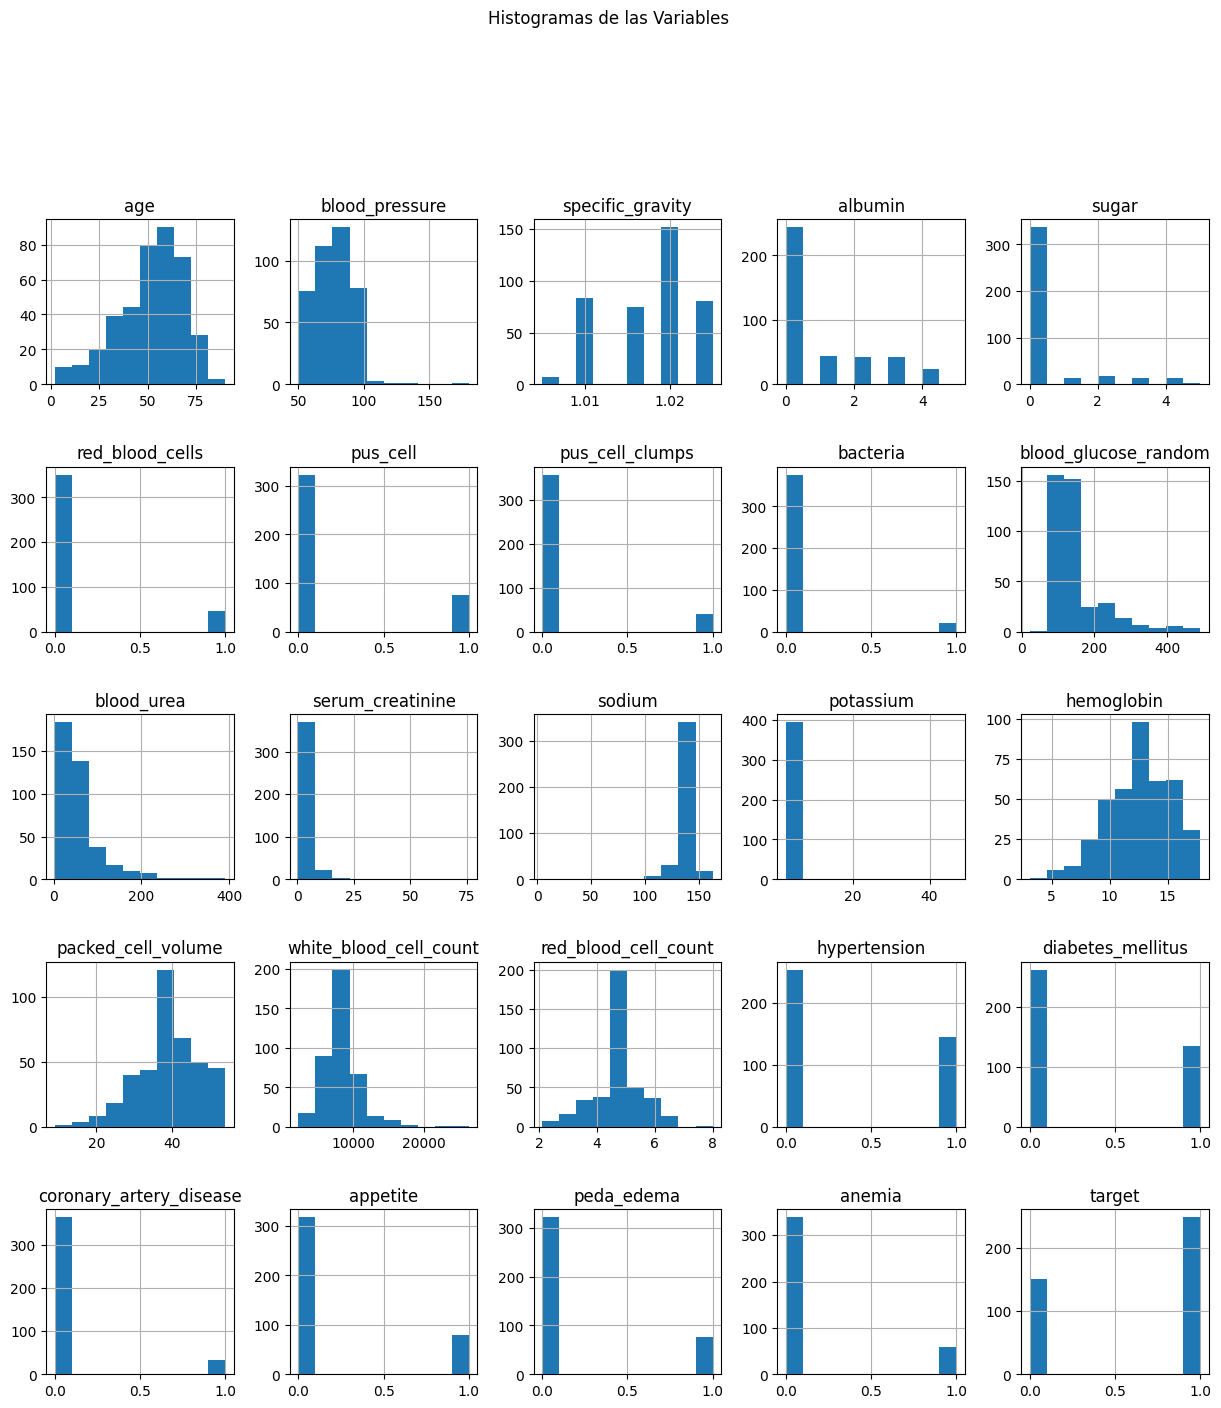

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear histogramas para cada columna
df.hist(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)  # Espaciado entre subgráficos
plt.suptitle('Histogramas de las Variables', y=1.02)
plt.show()

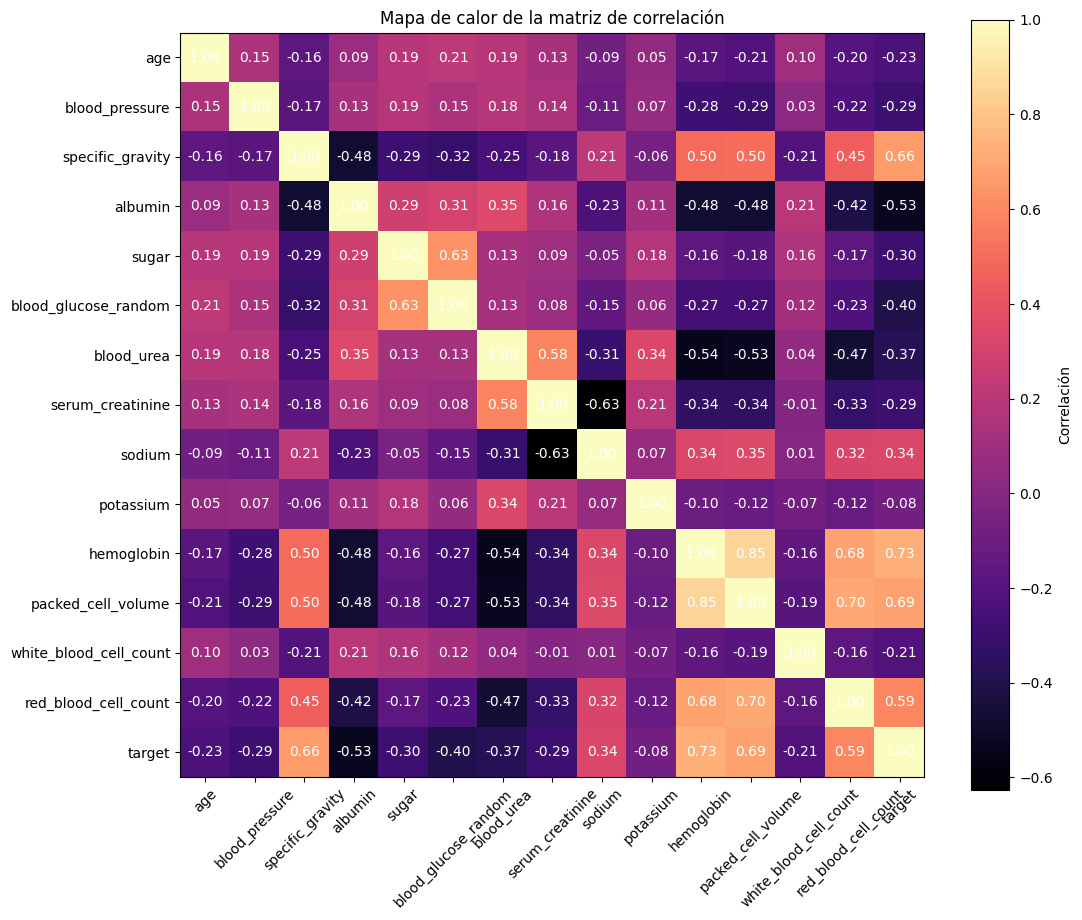

In [ ]:
# Calcular la matriz de correlación excluyendo las columnas especificadas
columns_to_exclude = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
                      'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
                      'appetite', 'peda_edema', 'anemia']
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]
matriz_correlacion = df[columns_to_include].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
heatmap = plt.imshow(matriz_correlacion, cmap='magma')

# Mostrar los valores de correlación en cada celda
for i in range(len(matriz_correlacion)):
    for j in range(len(matriz_correlacion)):
        plt.text(j, i, '{:.2f}'.format(matriz_correlacion.iloc[i, j]),
                 ha='center', va='center', color='white', fontsize=10)

plt.colorbar(heatmap, label='Correlación')
plt.xticks(range(len(matriz_correlacion)), matriz_correlacion.columns, rotation=45)
plt.yticks(range(len(matriz_correlacion)), matriz_correlacion.columns)
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

In [9]:
X=df.drop('target', axis=1)
y=df['target']

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif, k=10).fit_transform(X, y)
XTrain, XTest, yTrain, yTest=train_test_split(X_new,y,test_size=0.2,random_state=1)
#escalador=StandardScaler()
#XTrain=escalador.fit_transform(XTrain)
#XTest=escalador.fit_transform(XTest)

#XStandardized = escalador.fit_transform(X)
#from sklearn.decomposition import PCA
#pca = PCA(n_components=15)
#XPCA = pca.fit_transform(XStandardized)
#XTrainPCA, XTestPCA, yTrain, yTest = train_test_split(XPCA, y, test_size=0.2, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.98      1.00      0.99        47

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy: 0.9875
[[32  1]
 [ 0 47]]


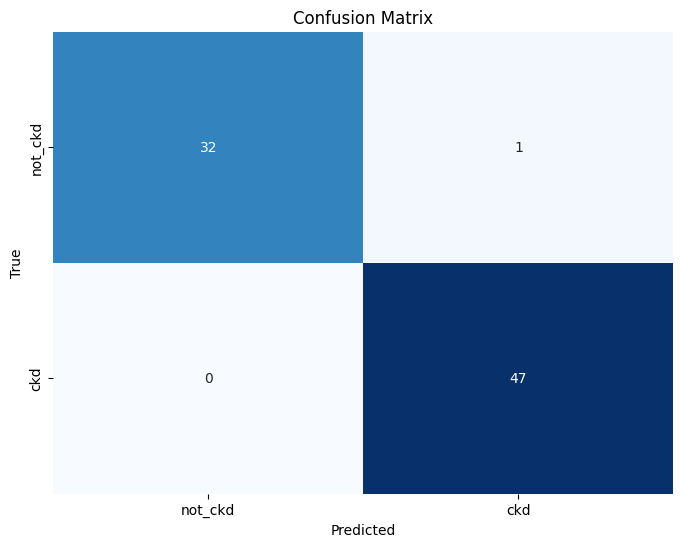

In [12]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
modelo = xgb.XGBClassifier(alpha=0.1)
modelo.fit(XTrain, yTrain)
yPredict=modelo.predict(XTest)
print(classification_report(yTest,yPredict))
print("Accuracy:",metrics.accuracy_score(yTest,yPredict))
conf_matrix=confusion_matrix(yTest,yPredict)
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
class_names = ['not_ckd', 'ckd']
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                 xticklabels=class_names, yticklabels=class_names)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.title('Confusion Matrix')
plt.show()